In [115]:
import json
from texttable import Texttable
import latextable
from tabulate import tabulate
import sys
file_directory = "../"
sys.path.append(file_directory)
from generateDataset import generateDatasetFromResults
from metric import internalResultConsistency
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D

In [116]:
shapeIndexPathResult = "../results/standard/shape_index_result.json"
shapeIndexPathSummary = "../results/standard/summary_shape_index_result.json"
shapeIndexDataset = generateDatasetFromResults(shapeIndexPathResult, shapeIndexPathSummary, "shape index network 100%")

In [117]:
shapeIndex0PathResult = "../results/shape-index-0-percent/shape_index_result.json"
shapeIndex0PathSummary = "../results/shape-index-0-percent/summary_shape_index_result.json"
shapeIndex0Dataset = generateDatasetFromResults(shapeIndex0PathResult, shapeIndex0PathSummary, "shape index network 0%")

In [118]:
shapeIndex20PathResult = "../results/shape-index-20-percent/shape_index_result.json"
shapeIndex20PathSummary = "../results/shape-index-20-percent/summary_shape_index_result.json"
shapeIndex20Dataset = generateDatasetFromResults(shapeIndex20PathResult, shapeIndex20PathSummary, "shape index network 20%")

In [119]:
shapeIndex50PathResult = "../results/shape-index-50-percent/shape_index_result.json"
shapeIndex50PathSummary = "../results/shape-index-50-percent/summary_shape_index_result.json"
shapeIndex50Dataset = generateDatasetFromResults(shapeIndex50PathResult, shapeIndex50PathSummary, "shape index network 50%")

In [120]:
shapeIndex80PathResult = "../results/shape-index-80-percent/shape_index_result.json"
shapeIndex80PathSummary = "../results/shape-index-80-percent/summary_shape_index_result.json"
shapeIndex80Dataset = generateDatasetFromResults(shapeIndex80PathResult, shapeIndex80PathSummary, "shape index network 80%")

In [121]:
evalInstances = [shapeIndexDataset, shapeIndex0Dataset, shapeIndex20Dataset, shapeIndex50Dataset, shapeIndex80Dataset]

In [122]:
head= ["Query", "HTTP Requests", "Average execution time", "std execution time"]
tables = []

In [123]:
def colorViolon(part, color):  
    for pc in part['bodies']:
        pc.set_color(color)
        pc.set_edgecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(0.75)
    part['cmeans'].set_color('black')
    part['cmins'].set_color('black')
    part['cmaxes'].set_color('black')
    part['cbars'].set_color('black')
    part['cmedians'].set_color('black')
    
color_map = {
    "shape index network 100%": '#1A85FF',
    "shape index network 0%": '#D41159',
    "shape index network 20%": '#004D40',
    "shape index network 50%": '#FFC107',
    "shape index network 80%": '#994F00'
}


def plotOneQueryExecutionTime(instances, queryName, color_map):
    
    query_map = {
        "interactive-discover-1": "D1",
        "interactive-discover-2": "D2",
        "interactive-discover-3": "D3",
        "interactive-discover-4": "D4",
        "interactive-discover-5": "D5",
        "interactive-discover-6": "D6",
        "interactive-discover-7": "D7",
        "interactive-discover-8": "D8",
        "interactive-short-1": "S1",
        "interactive-short-2": "S2",
        "interactive-short-3": "S3",
        "interactive-short-4": "S4",
        "interactive-short-5": "S5",
        "interactive-short-6": "S6",
        "interactive-short-7": "S7"
    }
    
    indexes = np.linspace(0, 0.25, 5)
    #yaxisIndexes = np.arange(0, 2500, 500)
    
    width = 0.05 
    
    fig, ax = plt.subplots(figsize=(10, 12))
    #ax.set_yticks(yaxisIndexes)
    ax.set_xticks(indexes)
    ax.set_xticklabels(["{}V{}".format(query_map[queryName],i) for i,v in enumerate(indexes)])
    
    violon_plots = {}
    for instance in evalInstances:
        all_data= [data if data is not None else [0,0,0,0,0] for label,data in instance.executionTime[queryName].items()]
        current_plot = ax.violinplot(all_data, indexes, widths=width, showmeans=True, showmedians=True)
        violon_plots[instance.name] = current_plot
    
    
    ax.set_xlabel("Query")
    ax.set_ylabel("Execution time (ms)")
    ax.grid(axis="both")

    legend_elements = []
    
    for label, plot in violon_plots.items():
        color = color_map[label]
        colorViolon(plot,color)
        legend_elements.append(Line2D([0], [0], color=color, label=label))
    ax.legend(handles=legend_elements)

## Single plots

### Discover

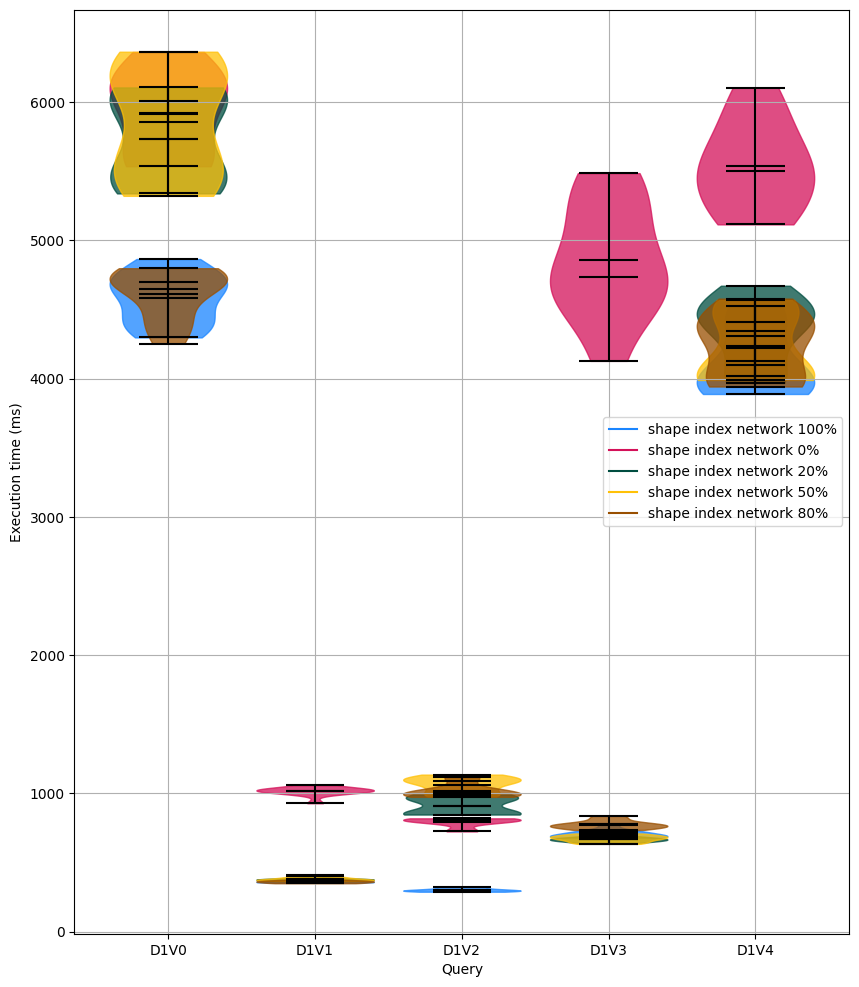

In [71]:
plotOneQueryExecutionTime(evalInstances,"interactive-discover-1", color_map)

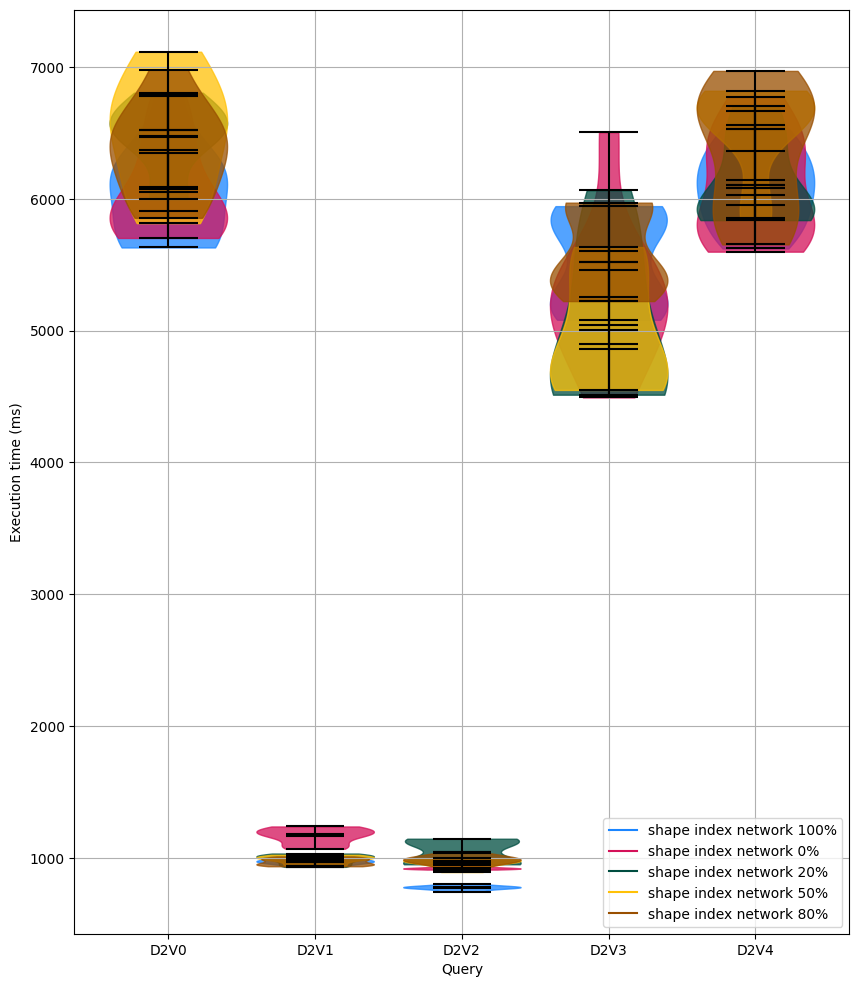

In [72]:
plotOneQueryExecutionTime(evalInstances,"interactive-discover-2", color_map)

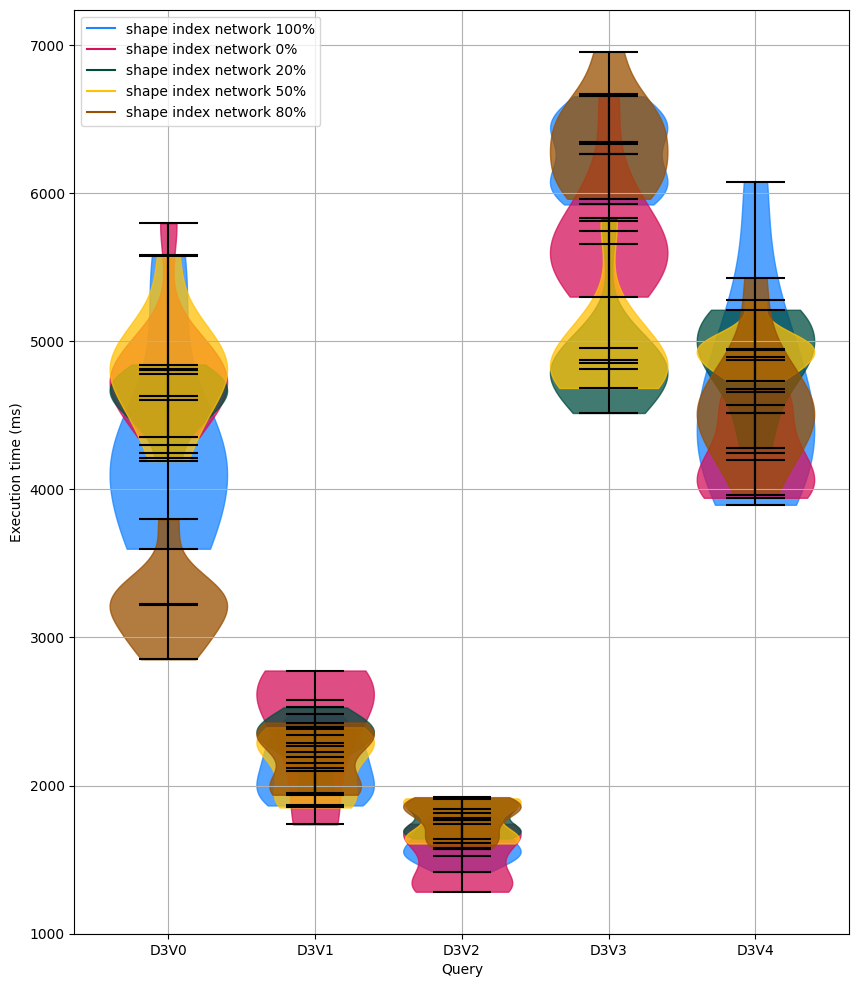

In [73]:
plotOneQueryExecutionTime(evalInstances,"interactive-discover-3", color_map)

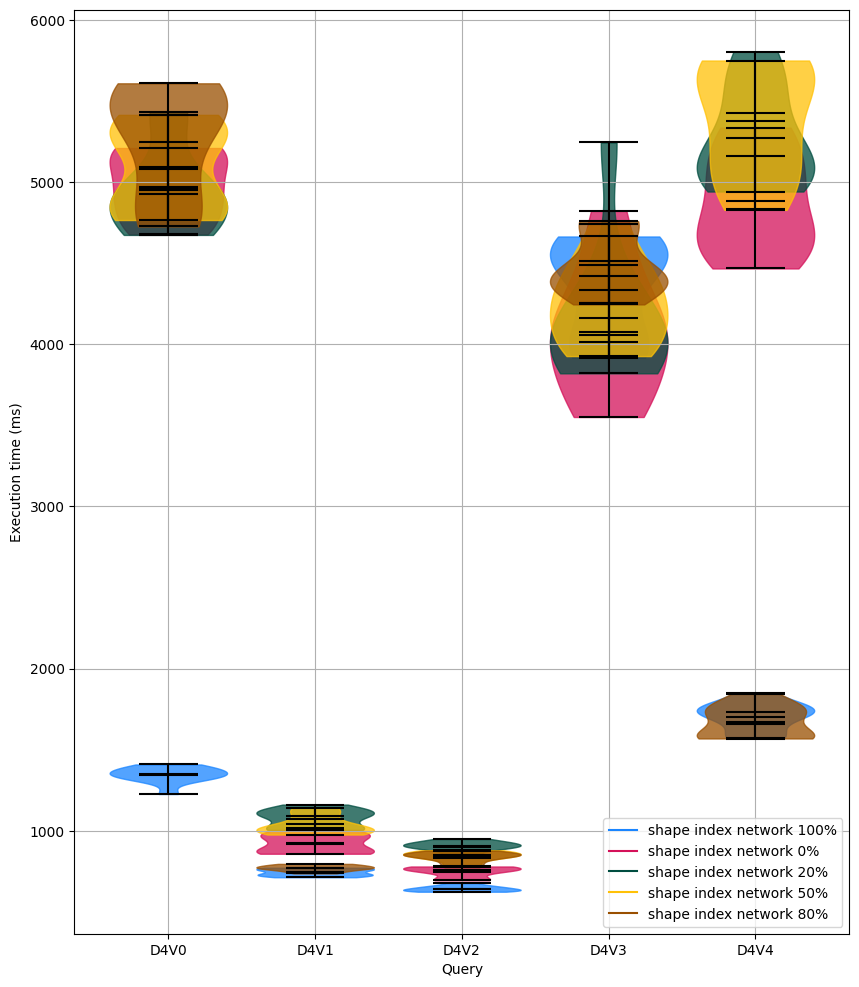

In [74]:
plotOneQueryExecutionTime(evalInstances,"interactive-discover-4", color_map)

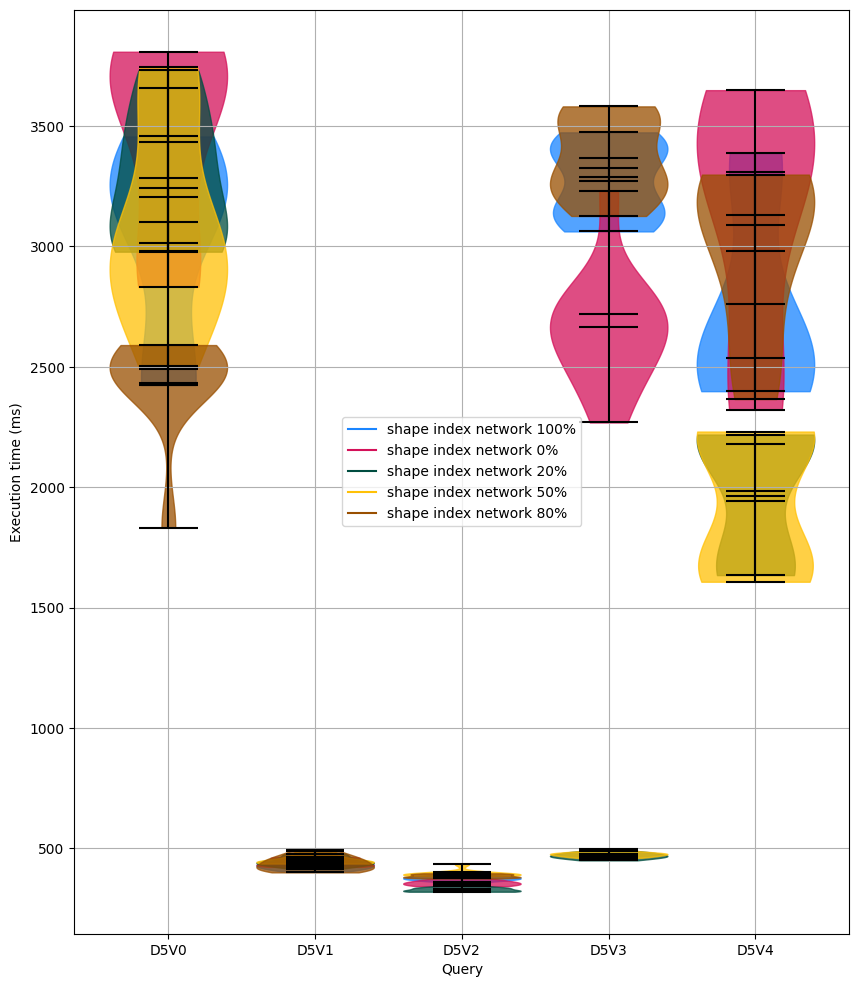

In [75]:
plotOneQueryExecutionTime(evalInstances,"interactive-discover-5", color_map)

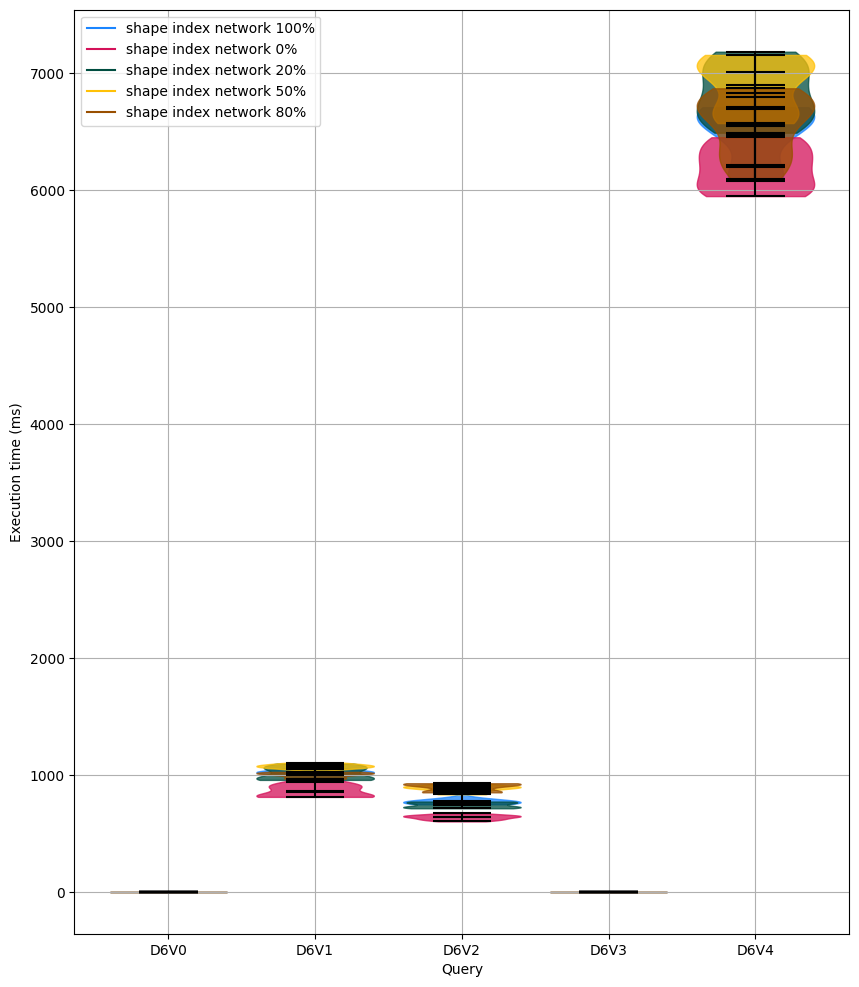

In [76]:
plotOneQueryExecutionTime(evalInstances,"interactive-discover-6", color_map)

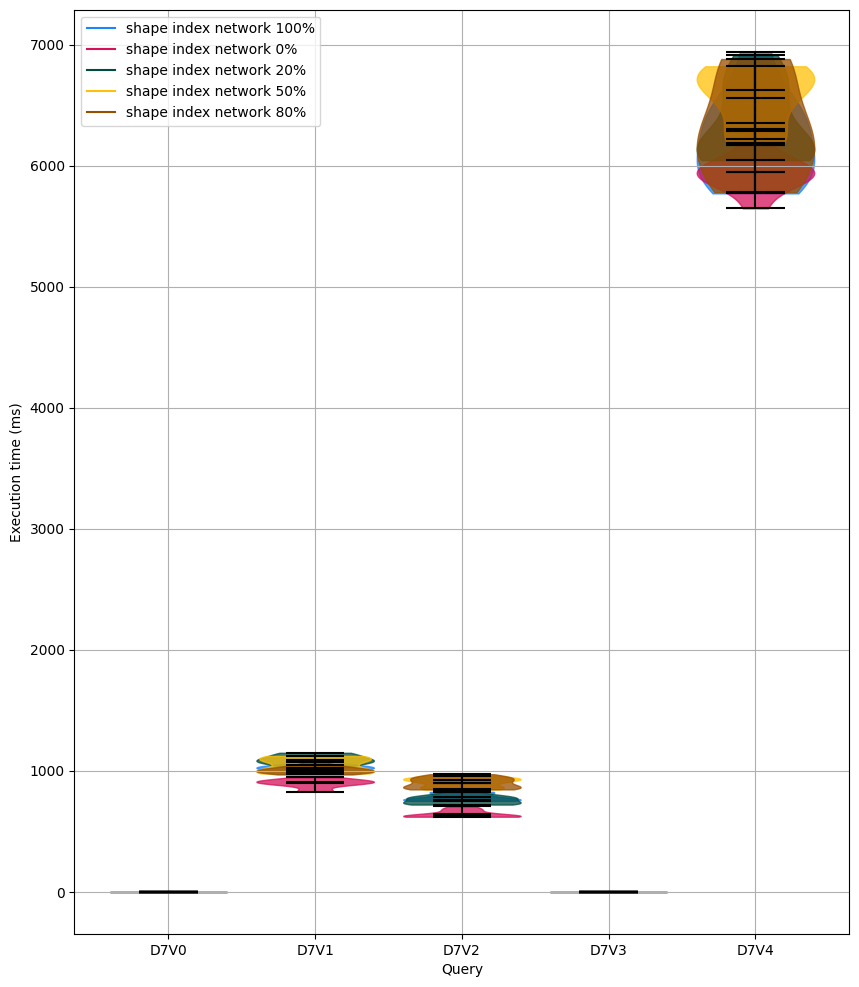

In [77]:
plotOneQueryExecutionTime(evalInstances,"interactive-discover-7", color_map)

### Short

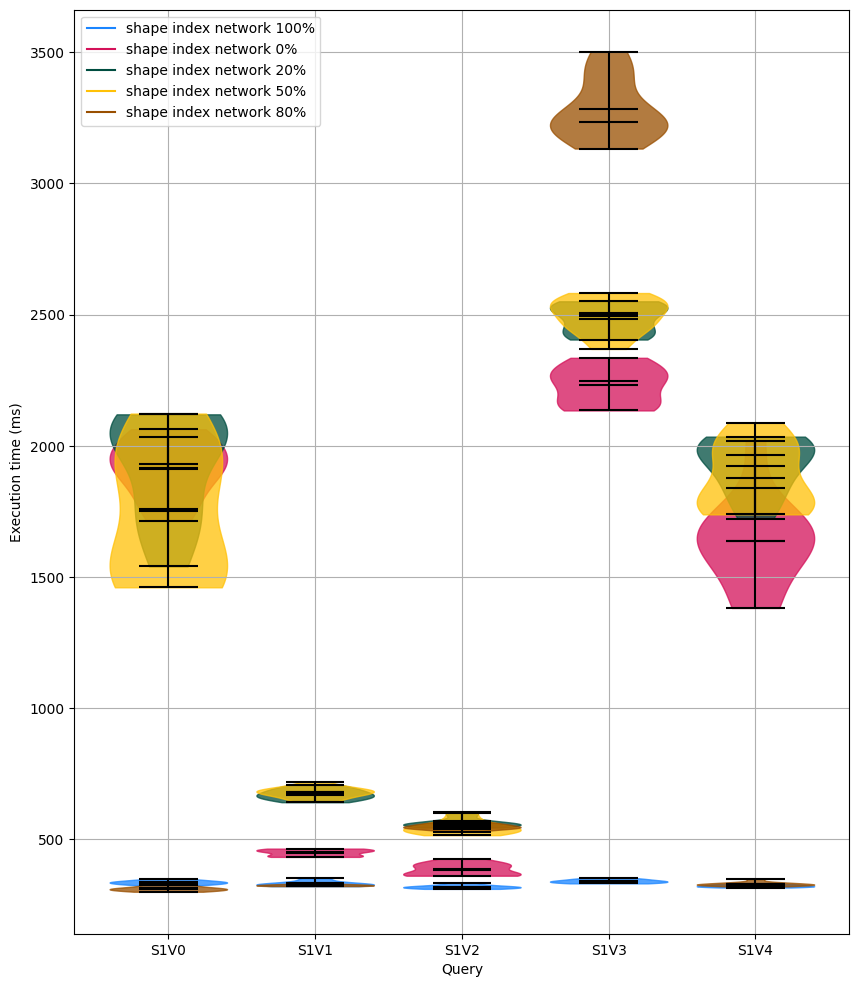

In [78]:
plotOneQueryExecutionTime(evalInstances,"interactive-short-1", color_map)

In [79]:
#plotOneQueryExecutionTime(evalInstances,"interactive-short-2", color_map)

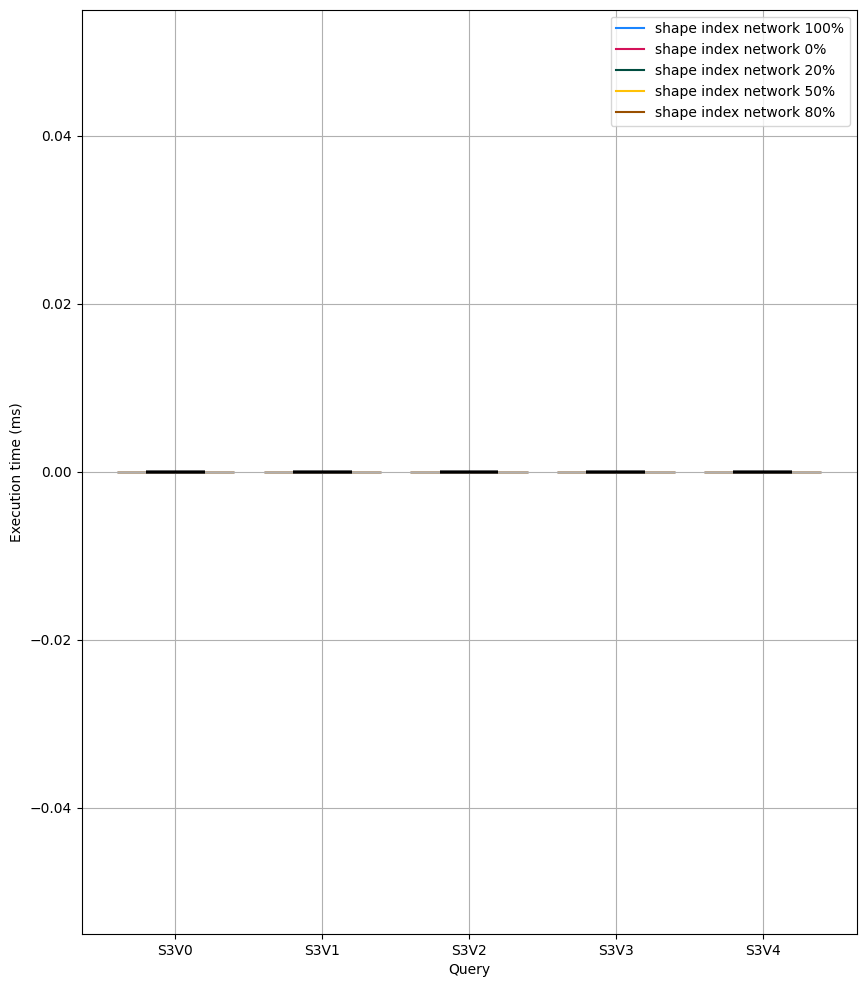

In [80]:
plotOneQueryExecutionTime(evalInstances,"interactive-short-3", color_map)

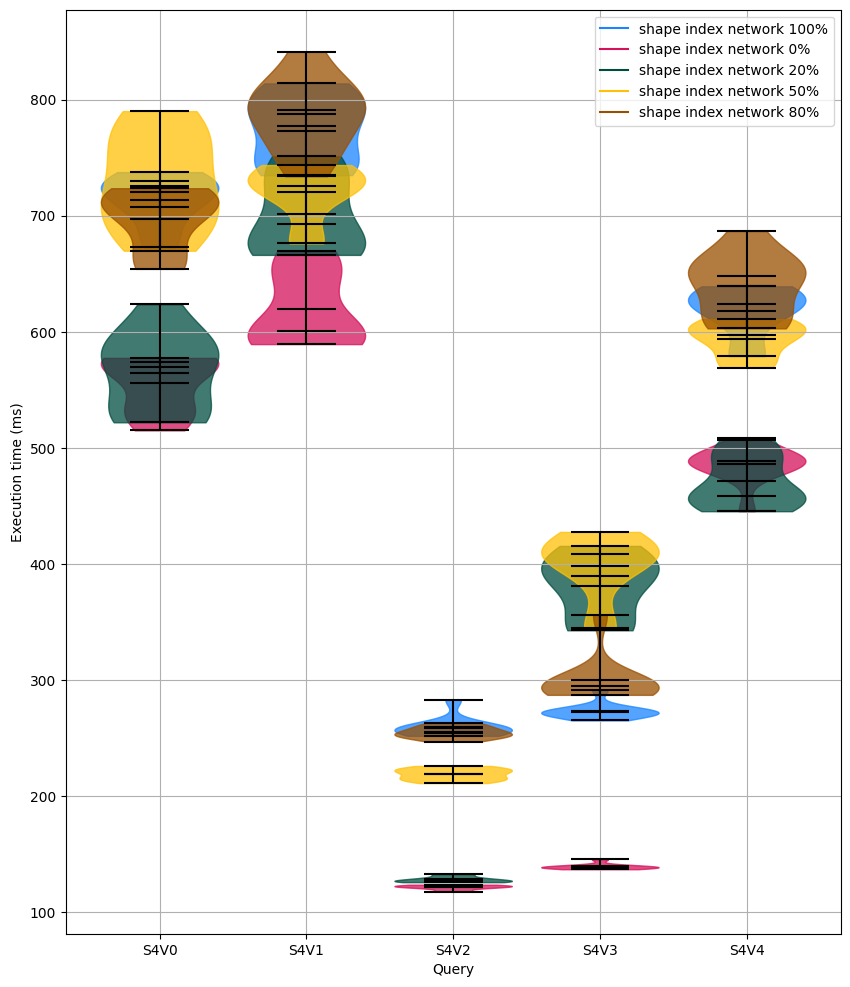

In [81]:
plotOneQueryExecutionTime(evalInstances,"interactive-short-4", color_map)

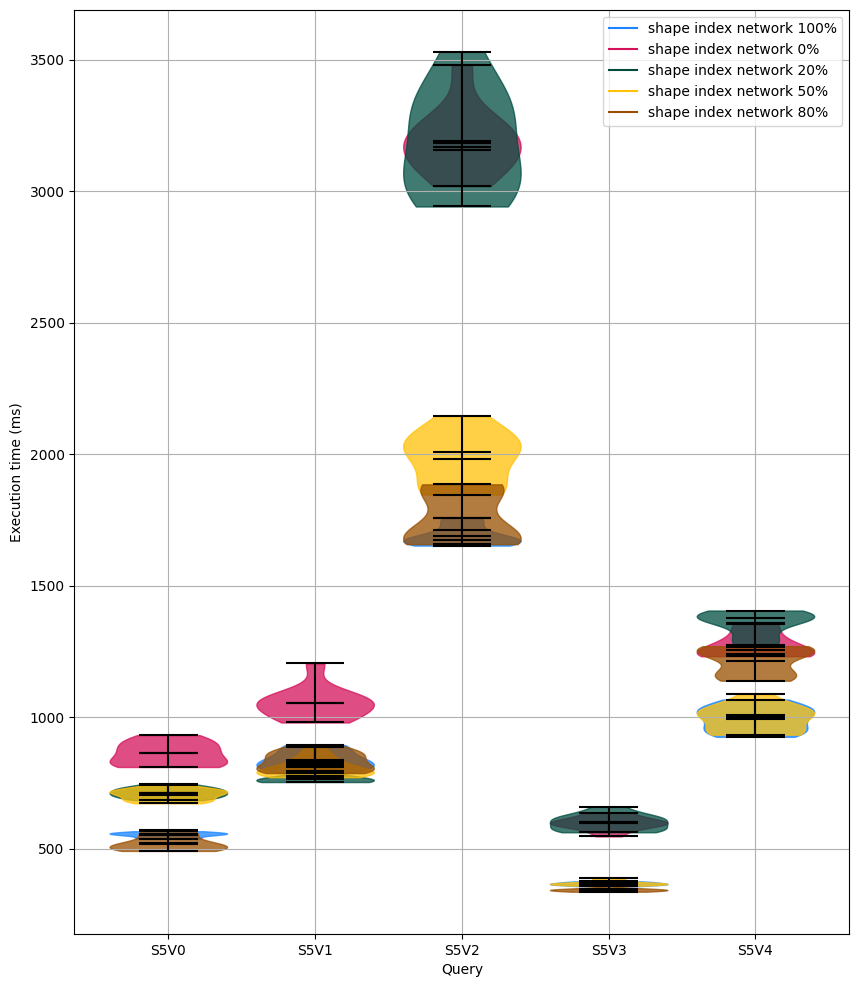

In [82]:
plotOneQueryExecutionTime(evalInstances,"interactive-short-5", color_map)

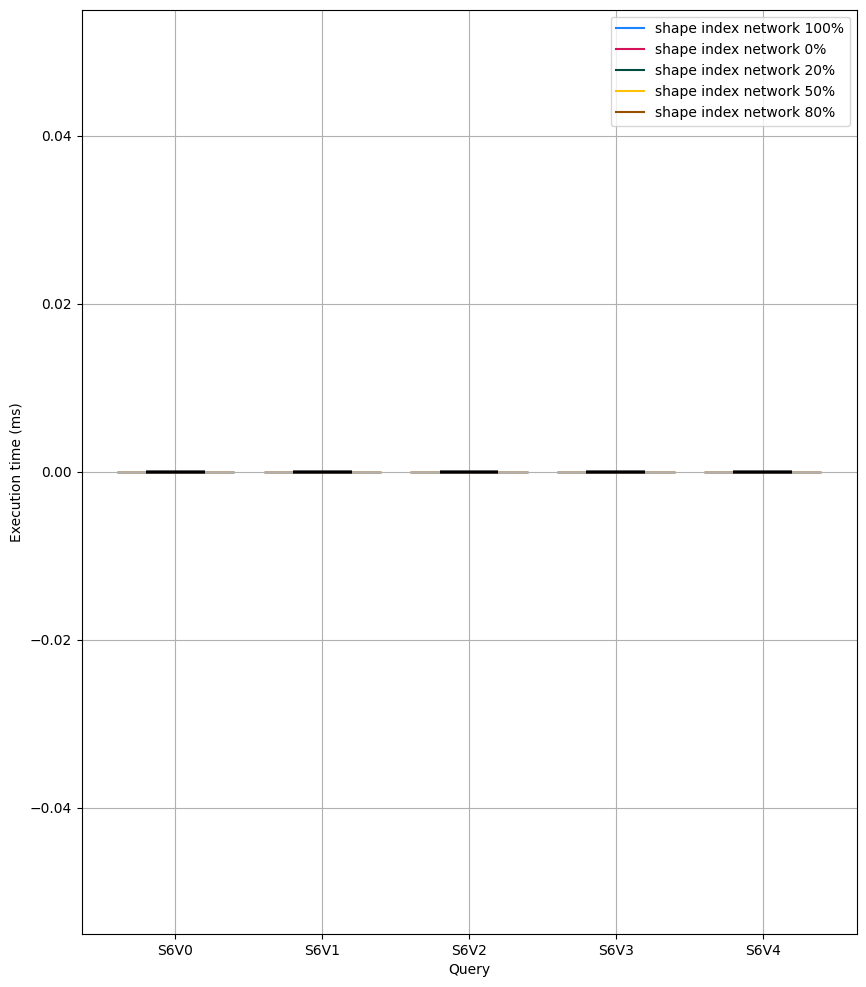

In [83]:
plotOneQueryExecutionTime(evalInstances,"interactive-short-6", color_map)

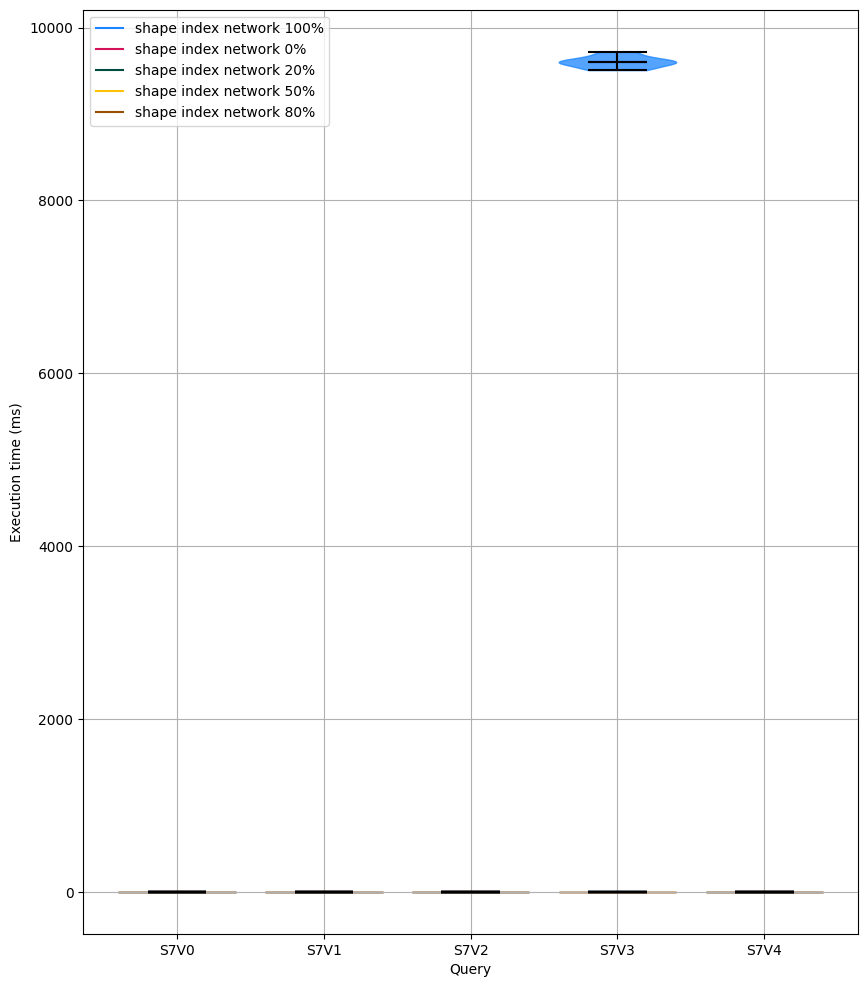

In [84]:
plotOneQueryExecutionTime(evalInstances,"interactive-short-7", color_map)

## One plot

In [158]:
def plotAllQueryExecutionTime(instances, color_map):
    
    query_map = {
        "interactive-discover-1": "D1",
        "interactive-discover-2": "D2",
        "interactive-discover-3": "D3",
        "interactive-discover-4": "D4",
        "interactive-discover-5": "D5",
        "interactive-discover-6": "D6",
        "interactive-discover-7": "D7",
        "interactive-discover-8": "D8",
        "interactive-short-1": "S1",
        "interactive-short-2": "S2",
        "interactive-short-3": "S3",
        "interactive-short-4": "S4",
        "interactive-short-5": "S5",
        "interactive-short-6": "S6",
        "interactive-short-7": "S7"
    }
    
    indexes = [1.25*i for i in range(0,5*len(query_map))]
    yaxisIndexes = np.arange(50, 15000, 500)
    
    width = 1 
    
    fig, ax = plt.subplots(figsize=(50, 12))
    
    ax.set_xticks(indexes)
    ax.set_yscale('log', base=10)
    ax.set_yticks(yaxisIndexes)
    ax.set_ylim(bottom=100)
        
    violon_plots = {}
    for instance in evalInstances:
        all_data= []
        for queryName in query_map.keys():
            all_data = all_data + [data if data is not None else [0,0,0,0,0] for label,data in instance.executionTime[queryName].items()]
        current_plot = ax.violinplot(all_data, indexes, widths=width, showmeans=True, showmedians=True)
        violon_plots[instance.name] = current_plot
    
    
    ax.set_xlabel("Query")
    ax.set_ylabel("Execution time (ms)")
    ax.grid(axis="both")

    
    ax.set_xticklabels(["{}V{}".format(query_map[queryName],i) for i,v in enumerate(indexes)], fontsize=15)
    
    ax.tick_params(axis='y', labelsize=15)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
    
    ax.set_xlabel("Query", fontsize=20)
    ax.set_ylabel("Execution time (ms)", fontsize=20)
    legend_elements = []
    
    for label, plot in violon_plots.items():
        color = color_map[label]
        colorViolon(plot,color)
        legend_elements.append(Line2D([0], [0], color=color, label=label))
    ax.legend(handles=legend_elements)

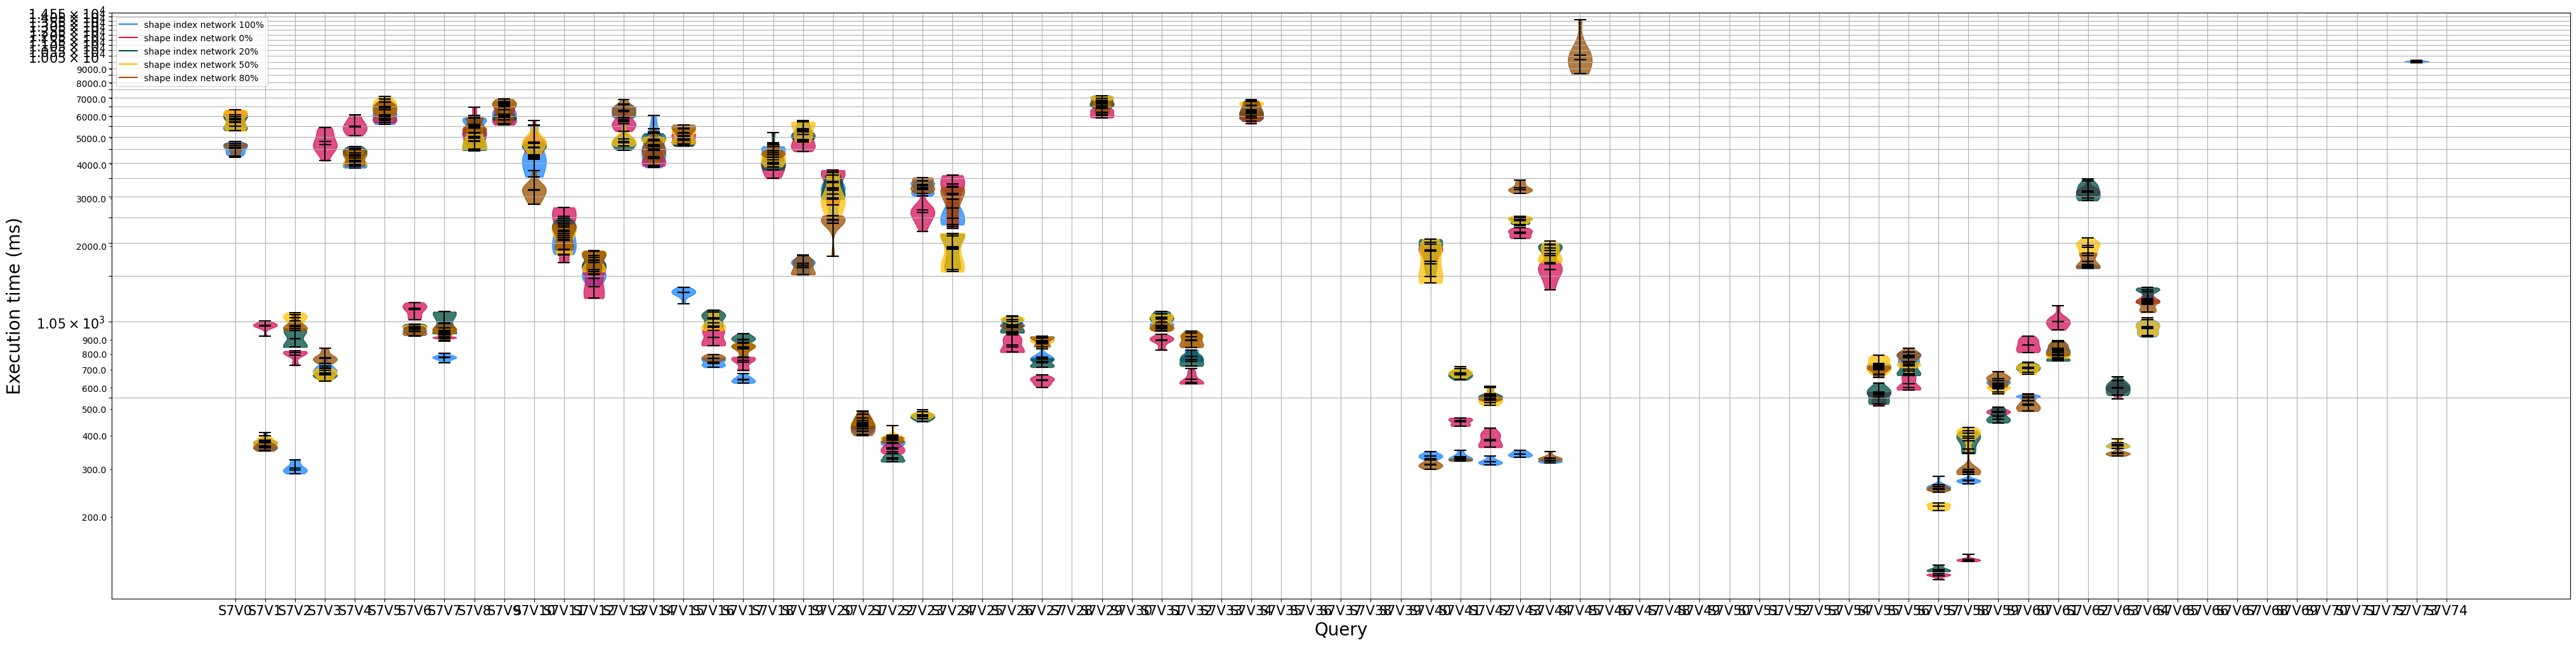

In [159]:
plotAllQueryExecutionTime(evalInstances, color_map)